In [2]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futu

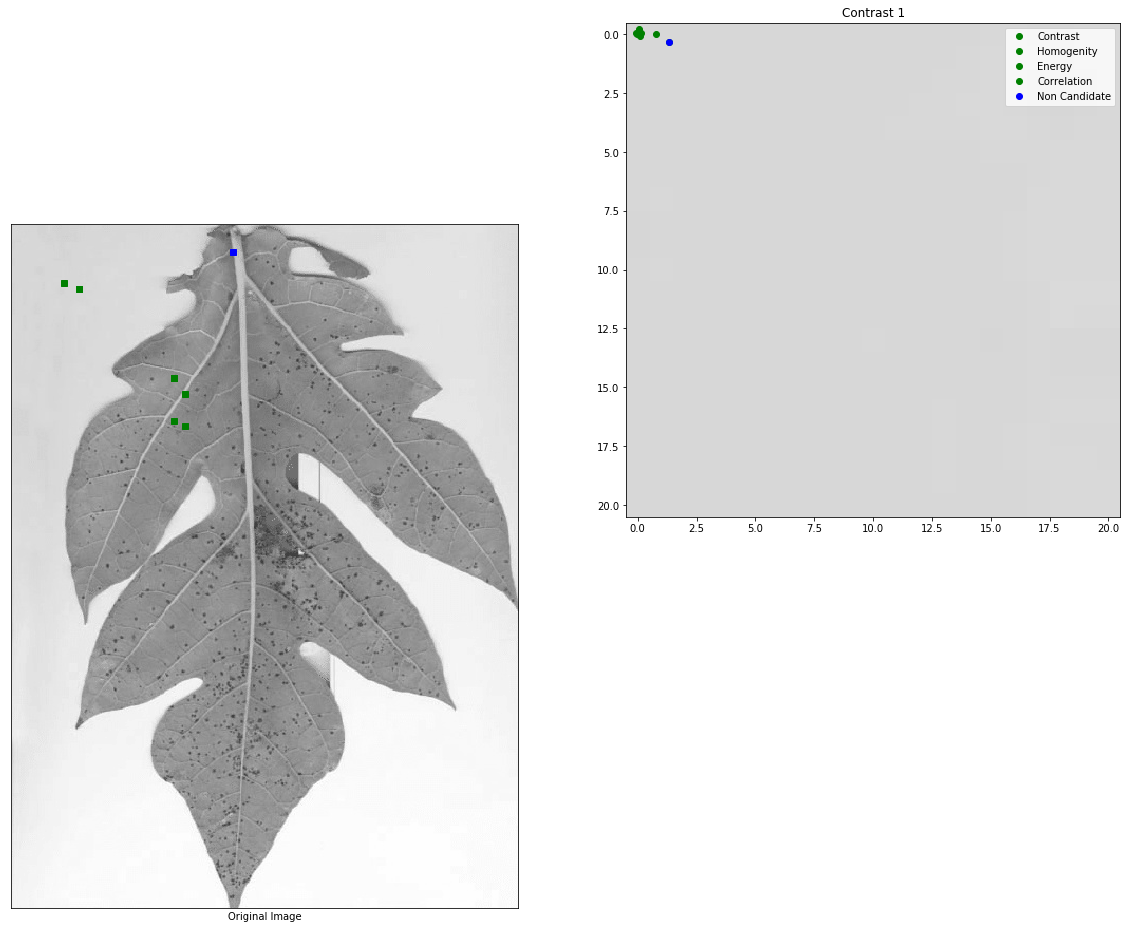

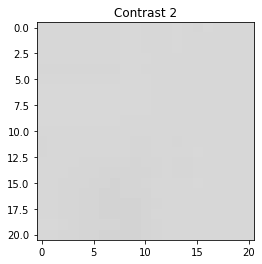

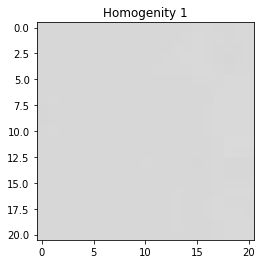

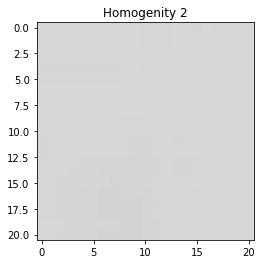

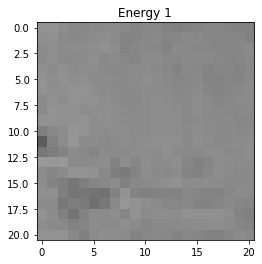

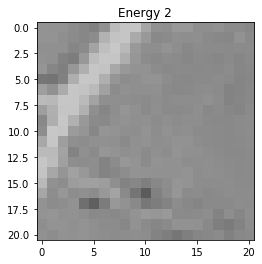

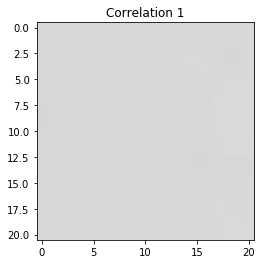

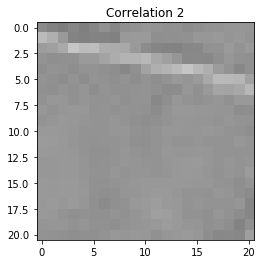

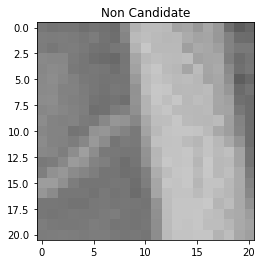

<Figure size 432x288 with 0 Axes>

In [32]:
images3=[cv.imread(file,cv.IMREAD_UNCHANGED) for file in sorted(glob.glob(r"C:\Users\USER\papaya\Papaya Black Spot\clip/*.png"))]

from skimage.feature import greycomatrix, greycoprops
from skimage import data
PATCH_SIZE = 21


    # open the camera image
image = images3[4]
 
    # select some patches from grassy areas of the image
    
contrast_locations = [(50, 54), (45, 40)]
contrast_patches = []
for loc in contrast_locations:
    contrast_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])    
    
homogeneity_locations = [(150, 154), (135, 144)]
homogeneity_patches = []
for loc in homogeneity_locations:
    homogeneity_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
energy_locations = [(180, 154), (175, 144)]
energy_patches = []
for loc in energy_locations:
    energy_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
correlation_locations = [(50, 54), (135, 144)]
correlation_patches = []
for loc in correlation_locations:
    correlation_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
 
    # select some patches from sky areas of the image
sky_locations = [(15, 200)]
sky_patches = []
for loc in sky_locations:
        sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])
 
    #compute some GLCM properties each patch
xs = []
ys = []
xs1 = []
ys1 = []
xs2 = []
ys2 = []
xs3 = []
ys3 = []
for patch in (contrast_patches):
        glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
        xs.append(greycoprops(glcm, 'contrast')[0, 0])
        ys.append(greycoprops(glcm, 'correlation')[0, 0])
for patch in (homogeneity_patches):
        glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
        xs1.append(greycoprops(glcm, 'homogeneity')[0, 0])
        ys1.append(greycoprops(glcm, 'correlation')[0, 0])
for patch in (energy_patches):
        glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
        xs2.append(greycoprops(glcm, 'energy')[0, 0])
        ys2.append(greycoprops(glcm, 'correlation')[0, 0])
for patch in (correlation_patches):
        glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
        xs3.append(greycoprops(glcm, 'correlation')[0, 0])
        ys3.append(greycoprops(glcm, 'correlation')[0, 0])
#create the figure
fig = plt.figure(figsize=(20, 20))

#display original image with locations of patches
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
  vmin=0, vmax=255)
        
for (y, x) in contrast_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in homogeneity_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in energy_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in correlation_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')
 
    #for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(2, 2, 2)
ax.plot(xs[:len(contrast_patches)], ys[:len(contrast_patches)], 'go',
    label='Contrast')
ax = fig.add_subplot(2, 2, 2)
ax.plot(xs1[:len(homogeneity_patches)], ys1[:len(homogeneity_patches)], 'go',
    label='Homogenity')
ax = fig.add_subplot(2, 2, 2)
ax.plot(xs2[:len(energy_patches)], ys2[:len(energy_patches)], 'go',
    label='Energy')
ax = fig.add_subplot(2, 2, 2)
ax.plot(xs3[:len(correlation_patches)], ys3[:len(correlation_patches)], 'go',
    label='Correlation')
ax.plot(xs[len(sky_patches):], ys[len(sky_patches):], 'bo',
    label='Non Candidate')
#ax.set_xlabel('GLCM Dissimilarity')
#ax.set_ylabel('GLCM Correlation')
ax.legend()

    #display the image patches
for i, patch in enumerate(contrast_patches):
        #ax = fig.add_subplot(3, len(contrast_patches), len(contrast_patches)*1 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
        plt.title('Contrast %d' % (i + 1))
        plt.show()

for i, patch in enumerate(contrast_patches):
        #ax = fig.add_subplot(4, len(contrast_patches), len(contrast_patches)*1 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
        plt.title('Homogenity %d' % (i + 1))
        plt.show()
        
for i, patch in enumerate(energy_patches):
        #ax = fig.add_subplot(5, len(energy_patches), len(energy_patches)*1 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
        plt.title('Energy %d' % (i + 1))
        plt.show()
        
for i, patch in enumerate(correlation_patches):
        #ax = fig.add_subplot(6, len(correlation_patches), len(correlation_patches)*1 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
        plt.title('Correlation %d' % (i + 1))
        plt.show()

for i, patch in enumerate(sky_patches):
        #ax = fig.add_subplot(6, len(sky_patches), len(sky_patches)*2 + i + 1)
        plt.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
        plt.title('Non Candidate')
        plt.show()
 
 
# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()